# ANOVA

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg

## One-Way ANOVA

### Pingouin

In [3]:
mean1 = 4
mean2 = 3.8
mean3 = 7

N1 = 30
N2 = 35
N3 = 29

stdev = 2

data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

groups = ['1']*N1 + ['2']*N2 + ['3']*N3

df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,5.336642,1
1,2.407648,1
2,3.399847,1
3,6.165063,1
4,7.096097,1
...,...,...
89,5.777876,3
90,11.820537,3
91,8.493352,3
92,10.864835,3


C:\Users\17809\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
pg.anova(data=df,dv='TheData',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,27.467333,4.647003e-10,0.376433


In [5]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.409260,3.976631,-0.567372,0.514772,-1.102181,5.152030e-01,-0.270952
1,1,3,3.409260,7.101091,-3.691831,0.538789,-6.852085,2.523695e-09,-1.760805
2,2,3,3.976631,7.101091,-3.124459,0.519529,-6.014025,1.111775e-07,-1.491815


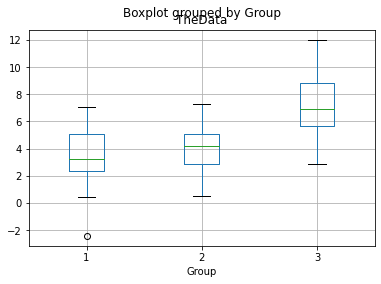

In [6]:
df.boxplot('TheData',by='Group');

### Scipy

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

# Two-Way Mixed ANOVA

In [7]:
data = np.loadtxt(open("TwoWayMixedANOVA_data.csv"),delimiter=",")

timepoint = ['1']*45 + ['2']*45 + ['3']*45
groups    = ['1']*15 + ['2']*15 + ['3']*15
s = []
for i in range(45):
    s += [str(i)]

df = pd.DataFrame(data=np.matrix.flatten(data,'F'),columns=['TheData'])
df['Group'] = np.tile(groups,3)
df['TimePoint'] = timepoint
df['Subject'] = np.tile(s,3)

pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,TheData,Group,TimePoint,Subject
0,13.0,1,1,0
1,15.0,1,1,1
2,13.0,1,1,2
3,16.0,1,1,3
4,17.0,1,1,4
5,18.0,1,1,5
6,16.0,1,1,6
7,16.0,1,1,7
8,18.0,1,1,8
9,17.0,1,1,9


In [8]:
pg.mixed_anova(data=df,dv='TheData',between='Group',within='TimePoint',subject='Subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,40.311111,2,42,20.155556,2.446942,9.880857e-02,0.104361,NaN
1,TimePoint,69.644444,2,84,34.822222,31.147184,7.588754e-11,0.425815,0.901879
2,Interaction,57.777778,4,84,14.444444,12.920019,3.051011e-08,0.380897,NaN
